

- Most oscillatory motion in nature  gradually decreases until the
  displacement becomes zero; such motion is said to be *damped*. 
- Consider the mass on a spring when a horizontal drag force is
  included.
- For small velocities, assume that the drag force is proportional
  to velocity.  The equation of motion can be written as

\begin{equation*}
\frac{d^2 x}{dt^2} = -\omega_0^2 x - \gamma \frac{dx}{dt}
\end{equation*}
where the *damping coefficient* $\gamma$ is a measure of the
magnitude of the drag term.
- Note that the drag term opposes the motion.

- In the linear case, the response of the damped harmonic
  oscillator to an external driving force is linear.
- If the magnitude of the external force is doubled, then the
  magnitude of the steady state motion is also doubled.
- What happens with a non-linear oscillator?
- Here we consider the non-linear pendulum with an external
  harmonic force and linear drag term.  
- The equation of motion is

\begin{equation*}
mL\frac{d^2 \theta}{dt^2} = -mg \sin \theta - \gamma \frac{d \theta}{dt}
+ F_D \cos(\omega_D t)
\end{equation*}
where $\gamma$ is the friction (damping) parameter, $F_D$ is the strength
of the driving force divided by $mL$, and $\omega_D$ is the driving frequency.

- Convert to dimensionless DEQ.

\begin{equation*}
\tau = t/t_0  \implies dt = t_0 d\tau
\end{equation*}

\begin{equation*}
\frac{mL}{t_0^2}\frac{d^2 \theta}{d\tau^2} = - mg \sin \theta - \frac{\gamma}{t_0} \frac{d \theta}{d\tau}
+ F_D \cos(\omega_D t_0 \tau)
\end{equation*}

\begin{equation*}
\frac{d^2 \theta}{d\tau^2} = - \frac{gt_0^2}{L} \sin \theta -
\frac{\gamma t_0}{mL}  \frac{d \theta}{d\tau}
+ \frac{F_D t_0^2}{mL}  \cos(\omega_D t_0 \tau)
\end{equation*}
- Let $t_0 = \sqrt{L/g} \implies F_D t_0^2/(mL) = F_D L/(mLg) =
  F_D/(mg) = G$. 
- Let $ q = \gamma t_0/mL.$ 
- Let $\Omega_D = \omega_0 t_0$. So

\begin{equation*}
\boxed{\frac{d^2 \theta}{d\tau^2} = - \sin \theta -
q  \frac{d \theta}{d\tau}
+ G \cos(\Omega_D  \tau)}
\end{equation*}

- We want to model this as a set of three coupled ODEs with $\phi = \Omega_d \tau$.
\begin{eqnarray*}
\frac{d \theta}{d\tau} &=& \omega \\
\frac{d \omega}{d\tau} &=& -\sin \theta - q \omega + G \cos(\phi)\\
\frac{d \phi}{d \tau} &=& \Omega_D
\end{eqnarray*}

- Chaotic behavior is the interplay between driving forces (i.e., $\Omega_D$) and the
  natural frequency (i.e., $\sqrt{g/L}$).


## Exercise 1: 

Write a python program to simulate a damped, driven pendulum using the 4th-order Runge-Kutta (rk4) method.  The rk4 function should be written as generally as possible to handle the remaining exercises.  You can define multiple functions and pass the name of the function to the rk4 solver.  In this example, the function "F1" is being passed to the "pend_rk4" function.
```python
F = F1
[theta,omega,time] = pend_rk4(F,theta_0,omega_0,taufinal,dtau)
```
The (inadequately-commented) code included below will get you started. 

Be prepared to plot the periodic angle $\theta$ on the interval $-\pi < \theta \le \pi$.  A driven pendulum can make circular motions with $|\theta|$ increasing to large values.  It might be useful to consider the "mod" operator (%) and the ``` np.where ``` function.

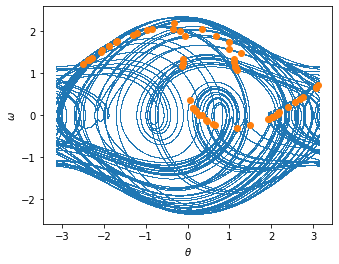

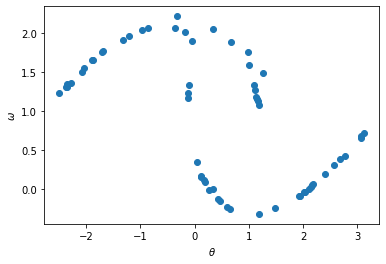

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import resample

#---------------------------------------------------------------------------------
def F1(theta,omega,tau):
    return np.array([omega, -np.sin(theta) - gamma*omega + G*np.cos(Omega_d*tau)])
#---------------------------------------------------------------------------------

#---------------------------------------------------------------------------------
def pend_rk4(F,theta1,omega1,taufinal,dtau):  #dimensionless solve
    theta = []
    omega = []
    time = []
    tau = 0.0
    while tau < taufinal:
        time.append(tau)
        theta.append(theta1)
        omega.append(omega1)
        k1 = dtau*F(theta1,omega1,tau)
        k2 = dtau*F(theta1 + 0.5*k1[0], omega1 + 0.5*k1[1], tau+dtau/2.)
        k3 = dtau*F(theta1 + 0.5*k2[0], omega1 + 0.5*k2[1], tau+dtau/2.)
        k4 = dtau*F(theta1 + k3[0], omega1 + k3[1], tau+dtau)
        theta1 = theta1 + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6.
        omega1 = omega1 + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6.
        tau = tau+dtau
    return np.asarray(theta),np.asarray(omega),np.asarray(time)
#---------------------------------------------------------------------------------

#--------------Initialize parameters----------------------------------------------
g_over_L = 1
t0 = 1/np.sqrt(g_over_L)
Q = 2
gamma = 1/Q
G = 1.2
omega_d = 0.667
Omega_d = omega_d*t0 #dimenionless frequency
T = 2*np.pi/Omega_d
dtau = 0.002
theta_0 = 20.0*np.pi/180.
omega_0 = 0.0
taufinal = 60*T
ncycle = (round(taufinal*Omega_d/(2*np.pi)))  #sample phase space once per cycle.

#---------------rk4---------------------------------------------------------------
F = F1

[theta,omega,time] = pend_rk4(F,theta_0,omega_0,taufinal,dtau)

theta = (theta + np.pi)%(2*np.pi) - np.pi

nstep = int(len(time)/ncycle)

fig = plt.figure(3)
ax = fig.add_subplot(111)
ax.plot(theta,omega,'.',markersize=1.5, markeredgewidth=0)
ax.plot(theta[::nstep],omega[::nstep],'o')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$\omega$')
ax.set_aspect('equal')
plt.show()

plt.figure(4)
plt.plot(theta[::nstep],omega[::nstep],'o')
plt.xlabel('$\\theta$')
plt.ylabel('$\omega$')
plt.show()

#fig = plt.figure(5)
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(time[::nstep],theta[::nstep],omega[::nstep])
#ax.set_xlabel('time')
#ax.set_ylabel('theta')
#ax.set_zlabel('omega')


## Exercise 2:

Examine the case of zero damping, zero driving, and small angle.  Here, $q \rightarrow 0$, $G \rightarrow 0$, $\Omega_D \rightarrow 0$, and $\sin \theta \rightarrow \theta$ such that
\begin{eqnarray*}
\frac{d \theta}{d \tau} &=& \omega\\
\frac{d \omega}{d \tau} & = & - \theta
\end{eqnarray*}
with analytical solutions $\theta(\tau) = A \cos \tau$ and $\omega(\tau) = - A \sin \tau$ where A is determined from initial conditions [$\theta(\tau = 0)$]. Plot the phase space trajectory ($\omega$ vs. $\theta$) for several cycles.  Is the area preserved properly?  If not, experiment with the time step. We expect the area to be preserved for conservative systems. 


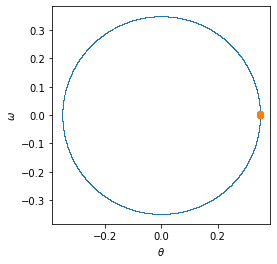

In [3]:
#---------------------------------------------------------------------------------
def Fsmall(theta,omega,tau):
    return np.array([omega, -theta - gamma*omega + G*np.cos(Omega_d*tau)])
#---------------------------------------------------------------------------------

G = 0
gamma = 0
dtau = 0.001
F = Fsmall
T = 2*np.pi/g_over_L
taufinal = 60*T
ncycle = (round(taufinal*g_over_L/(2*np.pi)))  #sample phase space once per cycle.

[theta,omega,time] = pend_rk4(F,theta_0,omega_0,taufinal,dtau)

theta = (theta + np.pi)%(2*np.pi) - np.pi

nstep = int(len(time)/ncycle)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta,omega,'.',markersize=1.5, markeredgewidth=0)
ax.plot(theta[::nstep],omega[::nstep],'o')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$\omega$')
ax.set_aspect('equal')
plt.show()


## Exercise 3: 

Now consider nonzero damping (e.g., $q = 0.5$), zero driving, and small angle.  Here, $G \rightarrow 0$ and $\sin \theta \rightarrow \theta$.  The solutions are 
\begin{eqnarray*}
\frac{d \theta}{d \tau } &=& \omega \\
\frac{d \omega}{d \tau} & = & -q \omega - \theta.
\end{eqnarray*}
Plot the phase space trajectory.  Is the phase space area preserved?  This is a dispersive system now.


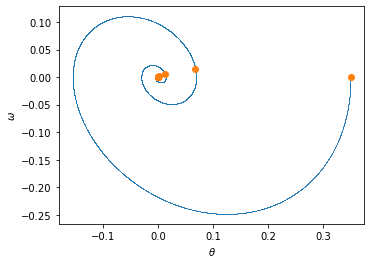

In [4]:
G = 0
gamma = 0.5
dtau = 0.002
F = Fsmall

[theta,omega,time] = pend_rk4(F,theta_0,omega_0,taufinal,dtau)

theta = (theta + np.pi)%(2*np.pi) - np.pi

nstep = int(len(time)/ncycle)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta,omega,'.',markersize=1.5, markeredgewidth=0)
ax.plot(theta[::nstep],omega[::nstep],'o')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$\omega$')
ax.set_aspect('equal')
plt.show()

## Exercise 4

Now consider the non-linear term for zero damping and zero driving, i.e., $q \rightarrow 0$, $G \rightarrow 0$, with equations
\begin{eqnarray*}
\frac{d \theta}{d \tau} &=& \omega \\
\frac{d \omega}{d \tau} &=& - \sin \theta.
\end{eqnarray*}
The phase space trajectories are $\frac{1}{2} \omega^2 - \cos \theta = const$.  Proof:
\begin{eqnarray*}
\frac{d \omega}{d \tau} &=& \frac{d \omega}{d \theta}\frac{d \theta}{d \tau} = - \sin \theta\\
& = & \omega \frac{d \omega}{d \theta} = - \sin \theta \\
& = & \frac{d}{d \theta} \left[ \frac{1}{2} \omega^2 \right]  =  \frac{d}{d\theta} [\cos \theta]
\end{eqnarray*}
Plot several phase space trajectories for different initial conditions.

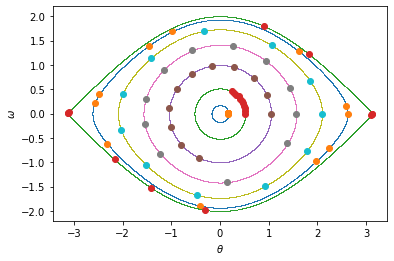

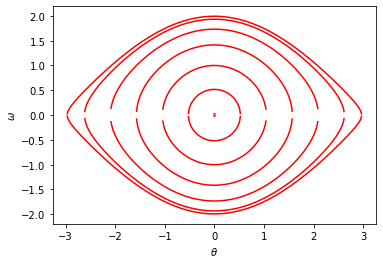

In [5]:
G = 0
gamma = 0.0
dtau = 0.002
taufinal = 10*T
ncycle = (round(taufinal*g_over_L/(2*np.pi)))  #sample phase space once per cycle.
F = F1
theta_0=np.array([10,30,60,90,120,150,179])*np.pi/180

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(theta_0)):
    [theta,omega,time] = pend_rk4(F,theta_0[i],omega_0,taufinal,dtau)

    theta = (theta + np.pi)%(2*np.pi) - np.pi

    nstep = int(len(time)/ncycle)
    
    ax.plot(theta,omega,'.',markersize=1.5, markeredgewidth=0)
    ax.plot(theta[::nstep],omega[::nstep],'o')
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('$\omega$')
    ax.set_aspect('equal')
plt.show()

#plot analytical trajectories

fig = plt.figure()
ax = fig.add_subplot(111)

k = np.cos(theta_0)
for i in range(len(k)):
    theta = np.linspace(-np.pi,np.pi,500)
    om2 = 2*(np.cos(theta) + k[i])
    wh = np.where(om2 >=0)
    omega = np.sqrt(om2[wh])
    ax.plot(theta[wh],omega, 'r', theta[wh],-omega, 'r')
    #ax.plot(theta[wh],-omega)
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('$\omega$')
    ax.set_aspect('equal')
    
plt.show()

## Exercise 5

Repeat exercise 4 with nonzero damping (e.g., $q = 0.5$).  Here the equations are 
\begin{eqnarray*}
\frac{d \theta}{d \tau} &=& \omega \\
\frac{d \omega}{ d \tau} & = & - q \omega - \sin \theta
\end{eqnarray*}

Experiment with different values of $q$.

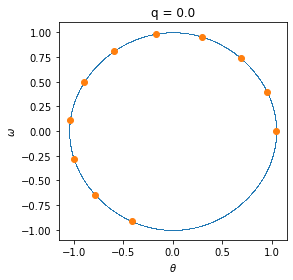

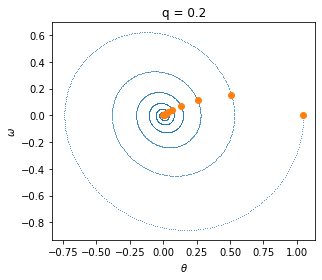

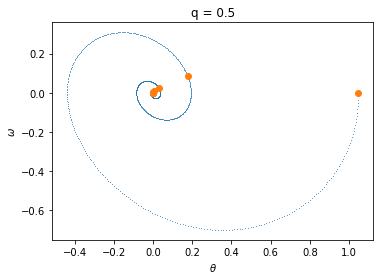

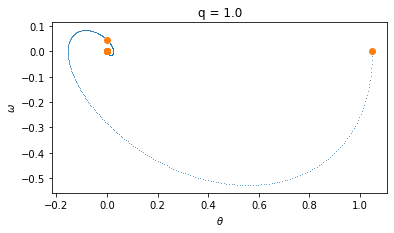

In [6]:
G = 0
gamma = 0.1
dtau = 0.02
F = F1
theta_0 = 60*np.pi/180
#theta_0=np.array([10,30,60,90,120,150,179])*np.pi/180
qarr = np.array([0,0.2,0.5,1.0])


for i in range(len(qarr)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    gamma = qarr[i]
    [theta,omega,time] = pend_rk4(F,theta_0,omega_0,taufinal,dtau)

    theta = (theta + np.pi)%(2*np.pi) - np.pi

    nstep = int(len(time)/ncycle)
    
    ax.plot(theta,omega,'.',markersize=1.5, markeredgewidth=0)
    ax.plot(theta[::nstep],omega[::nstep],'o')
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('$\omega$')
    ax.set_aspect('equal')
    ax.set_title('q = '+str(gamma))
    plt.show()


## Exercise 6

Repeat exercise 4 with nonzero damping (e.g., $q = 0.5$), nonzero driving (e.g., $G = 0.5$), and small angle (mass on a spring).  The equations are
\begin{eqnarray*}
\frac{d \theta}{d \tau} &=& \omega \\
\frac{d \omega}{d \tau} & = & -q \omega - \theta + G \sin \theta \\
\frac{ d \phi}{d \tau} & = & \Omega_D
\end{eqnarray*}

Experiment with different values of $q$ and $G$.

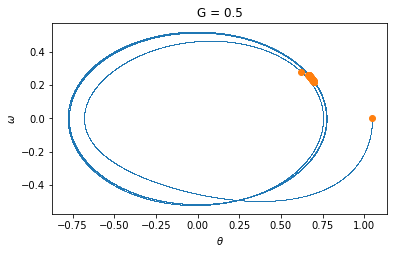

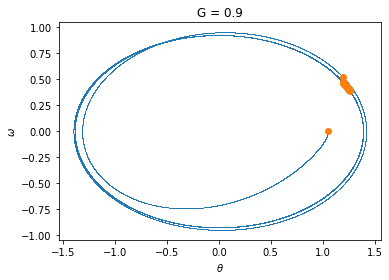

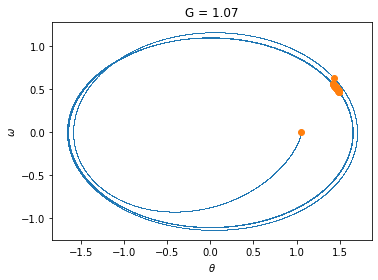

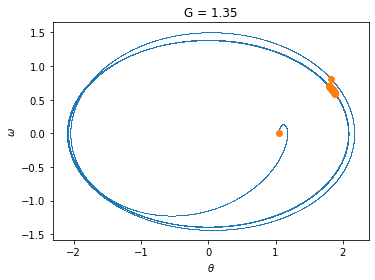

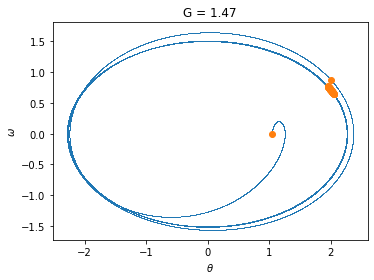

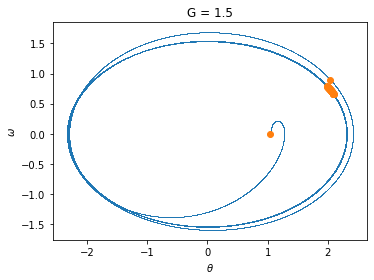

In [7]:
gamma = 0.5
dtau = 0.002
F = Fsmall
theta_0 = 60*np.pi/180
Garr = np.array([0.5,0.9,1.07,1.35, 1.47, 1.5])
taufinal = 60*T
ncycle = (round(taufinal*Omega_d/(2*np.pi)))  #sample phase space once per cycle.

for i in range(len(Garr)):
    G = Garr[i]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    [theta,omega,time] = pend_rk4(F,theta_0,omega_0,taufinal,dtau)

    theta = (theta + np.pi)%(2*np.pi) - np.pi

    nstep = int(len(time)/ncycle)
    
    ax.plot(theta,omega,'.',markersize=1.5, markeredgewidth=0)
    ax.plot(theta[::nstep],omega[::nstep],'o')
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('$\omega$')
    ax.set_aspect('equal')
    ax.set_title('G = ' + str(G))
    plt.show()

## Exercise 7

Finally, investigate the damped, sinusoidally-driven pendulum.  Make two plots for each case: 1) phase space and 2) a stroboscopic phase space.  Generally, the steady solution settles with a period equal to $\Omega_D$.  You will want to sample the results with the $\Omega_D$ frequency. This corresponds to times
\begin{equation*}
 t = \frac{2 \pi}{\Omega_D} n 
\end{equation*}
where $n$ is the number of completed cycles.  For well-behaved systems, this reduces the phase space plot to a single point: the value of ($\theta, \omega$) that is repeated at each cycle.  Chaotic system behave differently, but surprisingly the points gather on preferred points, or *strange attractors*.

Run the program for the following parameters ($q = 0.5$): $G = [0.5, 0.9, 1.07, 1.15, 1.35, 1.47, 1.5]$.
Finally, try G = 1.5 for different values of $q$.

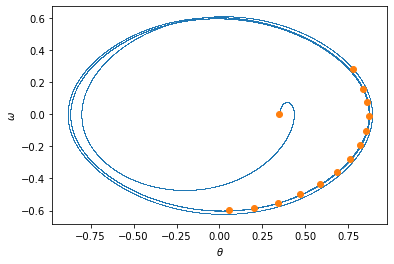

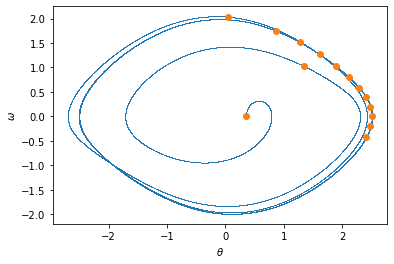

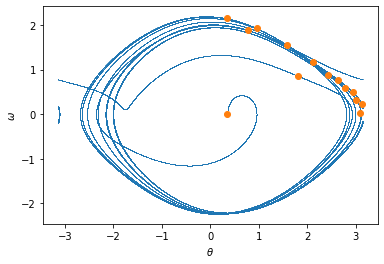

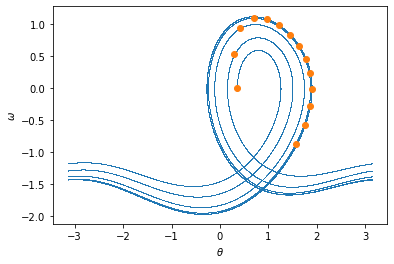

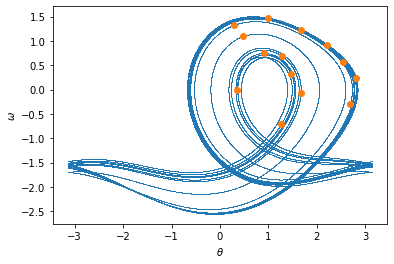

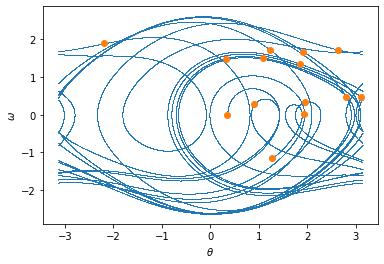

In [8]:
gamma = 0.5
dtau = 0.002
taufinal = 20*T
ncycle = (round(taufinal*Omega_d/(2*np.pi)))  #sample phase space once per cycle.
F = F1
theta_0= 20*np.pi/180
Garr = np.array([0.5,0.9,1.07,1.35, 1.47, 1.5])

for i in range(len(Garr)):
    G = Garr[i]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    [theta,omega,time] = pend_rk4(F,theta_0,omega_0,taufinal,dtau)

    theta = (theta + np.pi)%(2*np.pi) - np.pi

    nstep = int(len(time)/ncycle)
    
    ax.plot(theta,omega,'.',markersize=1.5, markeredgewidth=0)
    ax.plot(theta[::nstep],omega[::nstep],'o')
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('$\omega$')
    #ax.set_aspect('equal')
    plt.show()

## Exercise 8 (optional)

Time permitting, attempt to make a *bifurcation diagram*.  Determine the steady state periods (can be multiple periods) vs. G.  Try running for $0.9 < G < 1.2$.

In [9]:
G0 = 0.9
G1 = 1.2
dG = 0.0001
Garr = np.arange(G0,G1,dG)
dtau = 0.002
taufinal = 20*T
plt.figure(6)
Garray = []
Tarr=[]
F = F1

for i in range(len(Garr)):
    print(i,len(Garr))
    G = Garr[i]
    [theta,omega,time] = pend_rk4(F,theta_0,omega_0,taufinal,dtau)
    
    theta = (theta + np.pi)%(2*np.pi) - np.pi
    
    t = time[::nstep]
    th = theta[::nstep]
     
    for j in range(4):
        Garray.append(Garr[i])
        Tarr.append(th[-5+j])
    #print(G,th)
plt.plot(Garray,Tarr,'.',markersize=1)       
plt.xlabel('G')
plt.ylabel('$\\theta$')
#plt.savefig('bifurcation.pdf')


0 3000
1 3000
2 3000
3 3000
4 3000
5 3000
6 3000
7 3000
8 3000
9 3000
10 3000
11 3000
12 3000
13 3000
14 3000
15 3000
16 3000
17 3000
18 3000
19 3000
20 3000
21 3000
22 3000
23 3000
24 3000
25 3000
26 3000
27 3000
28 3000
29 3000
30 3000
31 3000
32 3000
33 3000
34 3000
35 3000
36 3000
37 3000
38 3000
39 3000
40 3000
41 3000
42 3000
43 3000
44 3000
45 3000
46 3000
47 3000
48 3000
49 3000
50 3000
51 3000
52 3000
53 3000
54 3000
55 3000
56 3000
57 3000
58 3000
59 3000
60 3000
61 3000
62 3000
63 3000
64 3000
65 3000
66 3000
67 3000
68 3000
69 3000
70 3000
71 3000
72 3000
73 3000
74 3000
75 3000
76 3000
77 3000
78 3000
79 3000
80 3000
81 3000
82 3000
83 3000
84 3000
85 3000
86 3000
87 3000
88 3000
89 3000
90 3000
91 3000
92 3000
93 3000
94 3000
95 3000
96 3000
97 3000
98 3000
99 3000
100 3000
101 3000
102 3000
103 3000
104 3000
105 3000
106 3000
107 3000
108 3000
109 3000
110 3000
111 3000
112 3000
113 3000
114 3000
115 3000
116 3000
117 3000
118 3000
119 3000
120 3000
121 3000
122 3000
123

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>